In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mat = loadmat('ex5data1') #load of data

In [295]:
X_train = mat['X']
y_train = mat['y']
X_test = mat['Xtest']
y_test = mat['ytest']
X_val = mat['Xval']
y_val = mat['yval']

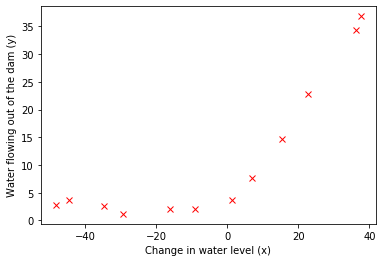

In [4]:
plt.plot(X_train, y_train, 'rx')
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.show()

In [5]:
def cost_function(X, y, theta, l):
    m = len(y)
    h = X.dot(theta)
    tmp1 = np.sum(np.square(h-y))/(2*m)
    tmp2 = np.sum(np.square(theta[1:])) * l/(2*m)
    return tmp1 + tmp2

In [6]:
theta = np.ones(2)
l = 1
X = np.insert(X_train, 0, values=1, axis=1)
y = y_train.flatten()
X, y

(array([[  1.        , -15.93675813],
        [  1.        , -29.15297922],
        [  1.        ,  36.18954863],
        [  1.        ,  37.49218733],
        [  1.        , -48.05882945],
        [  1.        ,  -8.94145794],
        [  1.        ,  15.30779289],
        [  1.        , -34.70626581],
        [  1.        ,   1.38915437],
        [  1.        , -44.38375985],
        [  1.        ,   7.01350208],
        [  1.        ,  22.76274892]]),
 array([ 2.13431051,  1.17325668, 34.35910918, 36.83795516,  2.80896507,
         2.12107248, 14.71026831,  2.61418439,  3.74017167,  3.73169131,
         7.62765885, 22.7524283 ]))

In [7]:
cost_function(X, y, theta, l)

303.9931922202643

In [8]:
def gradient(X, y, theta, l):
    m = len(y)
    h = X.dot(theta)
    tmp1 = (X.T.dot(h-y))/m
    tmp2 = theta.dot(l/m)
    summ = tmp1 + tmp2
    summ[0] = (1/m) * X.T.dot(h-y)[0]
    return summ

In [9]:
gradient(X, y, theta, l)

array([-15.30301567, 598.25074417])

In [19]:
l = 0
iterations = 4000
theta = np.zeros(2)
alpha = 0.001
j_history = np.array([0 for _ in range(iterations)], dtype=np.float32)

for i in range(iterations):
    new_theta = gradient(X, y, theta, l)
    theta -= alpha * new_theta
    j_history[i] = cost_function(X, y, theta, l)

In [20]:
h = X.dot(theta)
h

array([ 6.98219077,  2.14296746, 26.06864803, 26.54561944, -4.77955832,
        9.54357496, 18.4226289 ,  0.10958789, 13.32620992, -3.43390268,
       15.38560908, 21.1523197 ])

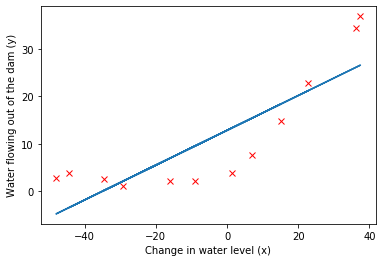

In [44]:
plt.plot(X_train, y_train, 'rx')
plt.plot(X_train, h)
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.show()

In [22]:
# part 2

In [296]:
X_val = np.insert(X_val, 0, values=1, axis=1)
y_val = y_val.flatten()
X_val, y_val

(array([[  1.        , -16.74653578],
        [  1.        , -14.57747075],
        [  1.        ,  34.51575866],
        [  1.        , -47.01007574],
        [  1.        ,  36.97511905],
        [  1.        , -40.68611002],
        [  1.        ,  -4.47201098],
        [  1.        ,  26.53363489],
        [  1.        , -42.7976831 ],
        [  1.        ,  25.37409938],
        [  1.        , -31.10955398],
        [  1.        ,  27.31176864],
        [  1.        ,  -3.26386201],
        [  1.        ,  -1.81827649],
        [  1.        , -40.7196624 ],
        [  1.        , -50.01324365],
        [  1.        , -17.41177155],
        [  1.        ,   3.5881937 ],
        [  1.        ,   7.08548026],
        [  1.        ,  46.28236902],
        [  1.        ,  14.61228909]]),
 array([ 4.17020201e+00,  4.06726280e+00,  3.18730676e+01,  1.06236562e+01,
         3.18360213e+01,  4.95936972e+00,  4.45159880e+00,  2.22763185e+01,
        -4.38738274e-05,  2.05038016e+01,  3.858

In [70]:
m = len(y)
error_train = np.zeros(m)
error_val = np.zeros(m)

for i in range(m):
    iterations = 5000
    theta = np.zeros(2)
    alpha = 0.001

    for j in range(iterations):
        new_theta = gradient(X[0:i+1, :], y[0:i+1], theta, 1)
        theta -= alpha * new_theta
    error_train[i] = cost_function(X[0:i+1, :], y[0:i+1], theta, 0)
    error_val[i] = cost_function(X_val, y_val, theta, 0)

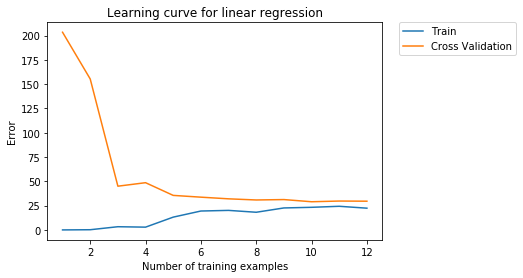

In [71]:
plt.plot(np.arange(1, m+1), error_train, label="Train")
plt.plot(np.arange(1, m+1), error_val, label="Cross Validation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

In [67]:
# part 3

In [89]:
def polyFeatures(X, p):
    m = len(X)
    X_poly = np.zeros((m, p))
    X_poly[:, 0] = X
    for i in range(1, p):
        X_poly[:, i] = X * X_poly[:, i-1]
    return X_poly

In [195]:
p = 8
X_poly = polyFeatures(X_train.flatten(), p)
X_poly = [[(X_poly[i][j]-X_poly[:, j].mean())/X_poly[:, j].std() for j in range(len(X_poly[i]))] for i in range(len(X_poly))]
X_poly = np.insert(X_poly, 0, values=1, axis=1)

In [297]:
X_val = mat['Xval']
X_poly_val = polyFeatures(X_val.flatten(), p)
X_poly_val = [[(X_poly_val[i][j]-X_poly_val[:, j].mean())/X_poly_val[:, j].std() for j in range(len(X_poly_val[i]))] for i in range(len(X_poly_val))]
X_poly_val = np.insert(X_poly_val, 0, values=1, axis=1)

In [215]:
def regularization(l):
    m = len(y)
    error_train = np.zeros(m)
    error_val = np.zeros(m)

    for i in range(m):
        iterations = 5000
        theta = np.zeros(p+1)
        alpha = 0.001

        for j in range(iterations):
            new_theta = gradient(X_poly[0:i+1, :], y[0:i+1], theta, l)
            theta -= alpha * new_theta
        error_train[i] = cost_function(X_poly[0:i+1, :], y[0:i+1], theta, l)
        error_val[i] = cost_function(X_poly_val, y_val, theta, l)
        
    h = X_poly.dot(theta)
    plt.plot(X_train, y_train, 'rx')
    plt.plot(X_train, h, 'bo')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.show()
    
    plt.plot(np.arange(1, m+1), error_train, label="Train")
    plt.plot(np.arange(1, m+1), error_val, label="Cross Validation")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Polynomial regression learning curve')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.show()

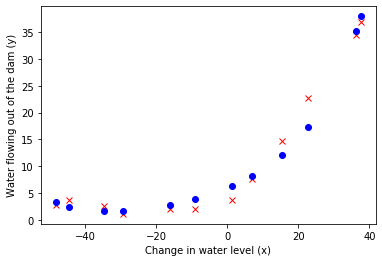

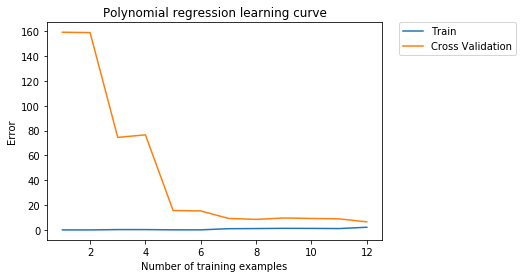

In [220]:
regularization(0)

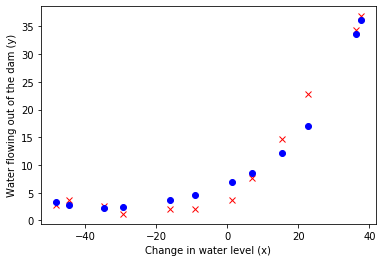

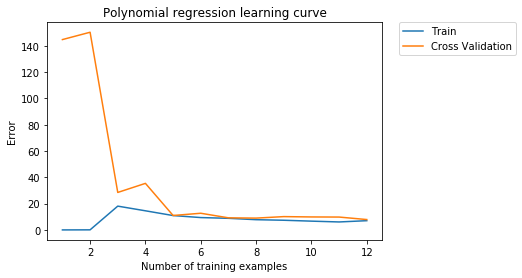

In [217]:
regularization(1)

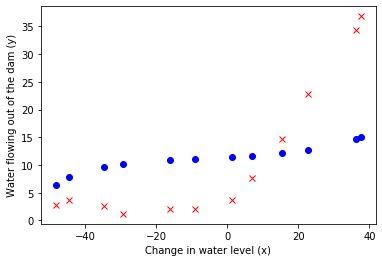

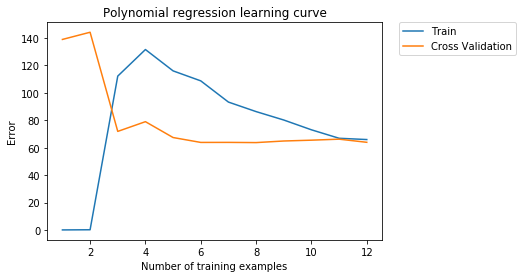

In [218]:
regularization(100)

In [244]:
def train(X, y, l):
    iterations = 10000
    theta = np.zeros(X.shape[1])
    alpha = 0.001

    for i in range(iterations):
        new_theta = gradient(X, y, theta, l)
        theta -= alpha * new_theta
    return theta

In [245]:
lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
error_train = np.zeros(len(lambda_vec))
error_val = np.zeros(len(lambda_vec))

for i in range(len(lambda_vec)):
    l = lambda_vec[i]
    theta = train(X_poly, y, l)
    error_train[i] = cost_function(X_poly, y, theta, l)
    error_val[i] = cost_function(X_poly_val, y_val, theta, l)

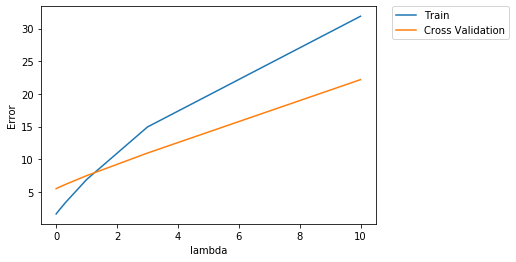

In [246]:
plt.plot(lambda_vec, error_train, label="Train")
plt.plot(lambda_vec, error_val, label="Cross Validation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()

In [254]:
X_poly_test = polyFeatures(X_test.flatten(), p)
X_poly_test = [[(X_poly_test[i][j]-X_poly_test[:, j].mean())/X_poly_test[:, j].std() for j in range(len(X_poly_test[i]))] for i in range(len(X_poly_test))]
X_poly_test = np.insert(X_poly_test, 0, values=1, axis=1)
y_test = y_test.flatten()

In [260]:
iterations = 10000
theta = np.zeros(p+1)
alpha = 0.001
l = 3
j_history = np.array([0 for _ in range(iterations)], dtype=np.float32)

for i in range(iterations):
    new_theta = gradient(X_poly_test, y_test, theta, l)
    theta -= alpha * new_theta
    j_history[i] = cost_function(X_poly_test, y_test, theta, l)

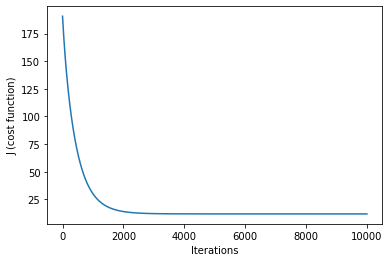

In [262]:
plt.plot(np.arange(0, iterations), j_history)
plt.ylabel('J (cost function)')
plt.xlabel('Iterations')
plt.show()

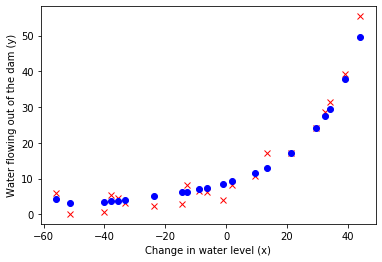

In [267]:
h = X_poly_test.dot(theta)
plt.plot(X_test, y_test, 'rx')
plt.plot(X_test, h, 'bo')
plt.ylabel('Water flowing out of the dam (y)')
plt.xlabel('Change in water level (x)')
plt.show()

In [315]:
m = 12
alpha = 0.001
l = 0.01
iterations = 5000
error_train = np.zeros(m)
error_val = np.zeros(m)
loops = 50

for k in range(loops):    
    for i in range(m):
        theta = np.zeros(p+1)
        n = i + 1
        index = np.random.choice(X_poly.shape[0], n, replace=False) 
        X_test = X_poly[index, :]
        y_test = y[index]

        index = np.random.choice(X_poly_val.shape[0], n, replace=False) 
        X_val = X_poly_val[index, :]
        y_val1 = y_val[index]
        
        for j in range(iterations):
            new_theta = gradient(X_test, y_test, theta, l)
            theta -= alpha * new_theta
            
        error_train[i] += cost_function(X_test, y_test, theta, l)
        error_val[i] += cost_function(X_val, y_val1, theta, l)

In [322]:
error_train1 = error_train/loops
error_val1 = error_val/loops

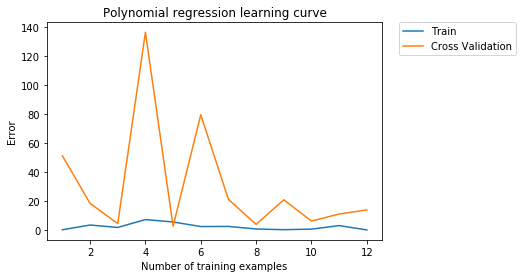

In [321]:
plt.plot(np.arange(1, m+1), error_train1, label="Train")
plt.plot(np.arange(1, m+1), error_val1, label="Cross Validation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Polynomial regression learning curve')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()